In [ ]:
import numpy as np
import torch
from models.models import TransRR
from customLib.vis import plot_ecg
from customLib.dataset import read_dataset
from customLib.config import apnea_ecg_path, mitbih_path

In [ ]:
x_train, y_train, x_test, y_test, x_val, y_val = read_dataset(mitbih_path + "\\dataset\\downsampled", is_validation_set=True)

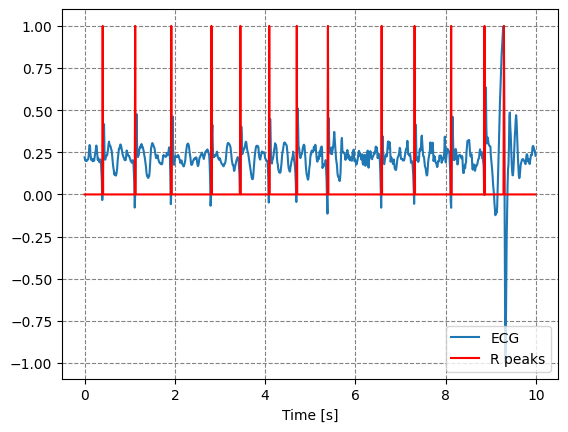

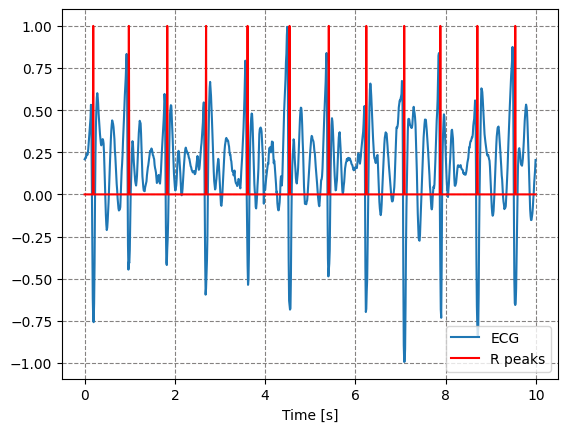

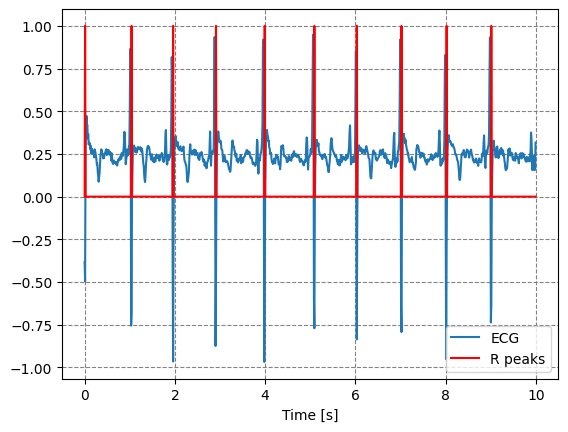

In [ ]:
x_train = np.expand_dims(x_train, 1)[:1000]
y_train = np.expand_dims(y_train, 1)[:1000]

x_test = np.expand_dims(x_test, 1)[:500]
y_test = np.expand_dims(y_test, 1)[:500]

x_val = np.expand_dims(x_val, 1)[:250]
y_val = np.expand_dims(y_val, 1)[:250]

plot_ecg(x_train[100].flatten(), y_train[100].flatten(), 100)
plot_ecg(x_test[-1].flatten(), y_test[-1].flatten(), 100)
plot_ecg(x_val[-1].flatten(), y_val[-1].flatten(), 100)

In [7]:
transRR = TransRR(num_layers=4, input_dim=64, nhead=4, dropout=0.2, loss_pos_weight=10, loss_neg_weight=1, learning_rate=1e-2)

Training will be performed with: cuda:0


====Epoch [1/10]====


 99%|█████████▉| 99/100 [00:16<00:00,  5.99it/s]

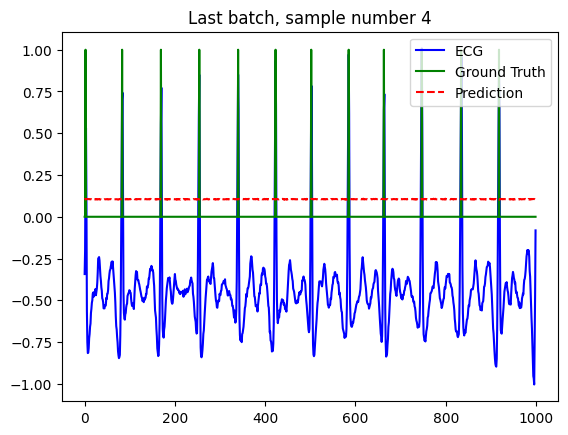

100%|██████████| 100/100 [00:17<00:00,  5.80it/s]



Train Loss: 0.4070
Train Weighted Accuracy: 0.50034
Train F1 Score: 0.01196
Train TPR: 0.01067
Train FPR: 0.00999
Train TNR: 0.99001
Train FNR: 0.98933



100%|██████████| 25/25 [00:01<00:00, 15.76it/s]



Validation Loss: 0.3985
Validation Weighted Accuracy: 0.50000
Validation F1 Score: 0.00000
Validation TPR: 0.00000
Validation FPR: 0.00000
Validation TNR: 1.00000
Validation FNR: 1.00000

====Epoch [2/10]====


 99%|█████████▉| 99/100 [00:16<00:00,  5.97it/s]

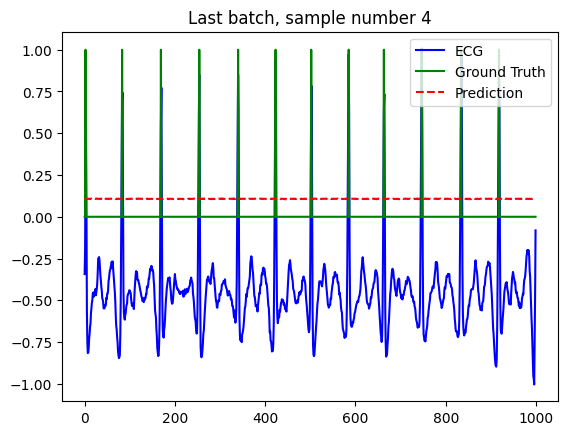

100%|██████████| 100/100 [00:17<00:00,  5.87it/s]



Train Loss: 0.3970


KeyboardInterrupt: 

In [8]:
transRR.train_model(x_train=x_train, y_train=y_train, epochs=10, batch_size=10, x_val=x_val, y_val=y_val)